In [1]:
import pywt
import numpy as np
import glob
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
CompiledData = pd.read_csv('Compiled_data.csv')


In [3]:
f = int(CompiledData.shape[0]/20480)  # number of files for this dataset

In [4]:
n = 1024 # size of segment

In [5]:
m = int(CompiledData.shape[0]/n)

In [6]:
s = int(m/f)  # number of segment in each file

In [7]:
m = int(CompiledData.shape[0]/n )# number of segments

In [8]:
print("length of segment:",n)
print("number of files:",f)
print("number of segments in each file:",s)
print("Toral number of segment:",m)

length of segment: 1024
number of files: 17
number of segments in each file: 20
Toral number of segment: 340


In [9]:
segmented_data = np.repeat(np.nan, m*n).reshape(m,n)
num =0
for j in range(2,f+2):
    file = pd.read_csv(str(j)+ ".txt",sep='\s+', header=None)
    temp = file[1]
    temp = temp *(1000/0.215)
    for i in range(s):
        segmented_data[num,:] = temp[i*n:(i+1)*n]
        num = num+1

In [10]:
segmented_data.shape

(340, 1024)

In [11]:
seg_data = pd.DataFrame(segmented_data)

In [12]:
seg_data.shape

(340, 1024)

In [13]:
d = 3   # depth 

In [14]:
p = 2**d     # Number of features

In [15]:
# Computes 3 level wavelet packet decomposition
wp = pywt.WaveletPacket(segmented_data[0,:], wavelet = "sym8", maxlevel = d) 


In [16]:
# Packet node names.
packet_names = [node.path for node in wp.get_level(d, "natural")]
packet_names

['aaa', 'aad', 'ada', 'add', 'daa', 'dad', 'dda', 'ddd']

In [17]:
# Number of coefficients after 3 stage transformation.
[wp[node.path].data.shape for node in wp.get_level(d, "natural")]

[(141,), (141,), (141,), (141,), (141,), (141,), (141,), (141,)]

In [18]:
feature_matrix_wav_packet_energy = np.repeat(np.nan, m*p).reshape(m,p)
for i in range(len(segmented_data)):
    wp = pywt.WaveletPacket(segmented_data[i,:], wavelet = "sym8", maxlevel = d) # Wavelet packet transformation
    for j in range(p):
        new_wp = pywt.WaveletPacket(data = None, wavelet = "sym8", maxlevel = d)
        new_wp[packet_names[j]] = wp[packet_names[j]].data
        reconstructed_signal = new_wp.reconstruct(update = False) # Signal reconstruction from wavelet packet coefficients
        feature_matrix_wav_packet_energy[i,j] = np.linalg.norm(reconstructed_signal)**2 # Energy of reconstructed signal for every node

In [19]:
feature_matrix_wpt = pd.DataFrame(feature_matrix_wav_packet_energy)

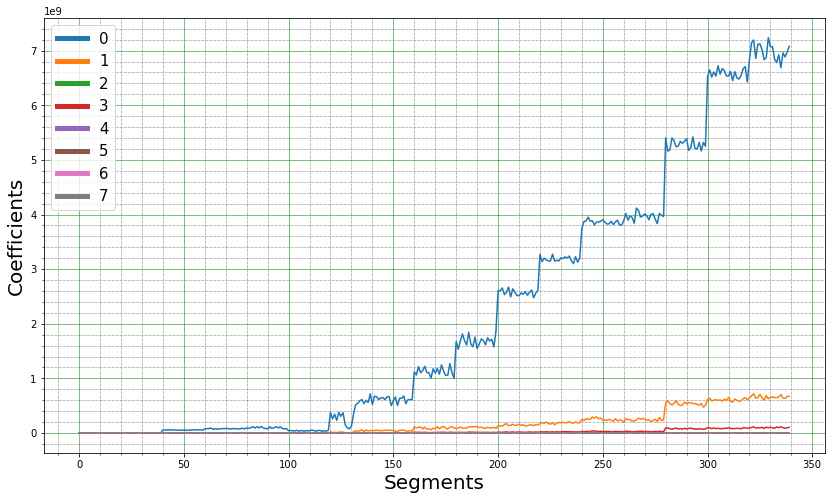

In [20]:
fig, ax = plt.subplots()
feature_matrix_wpt.iloc[:,:].plot(figsize = (14,8),ax = ax)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='g')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
leg = plt.legend(loc = 2,prop = {'size':15})
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth = 5)
plt.xlabel('Segments',fontsize = 20)
plt.ylabel('Coefficients',fontsize = 20)
plt.show()

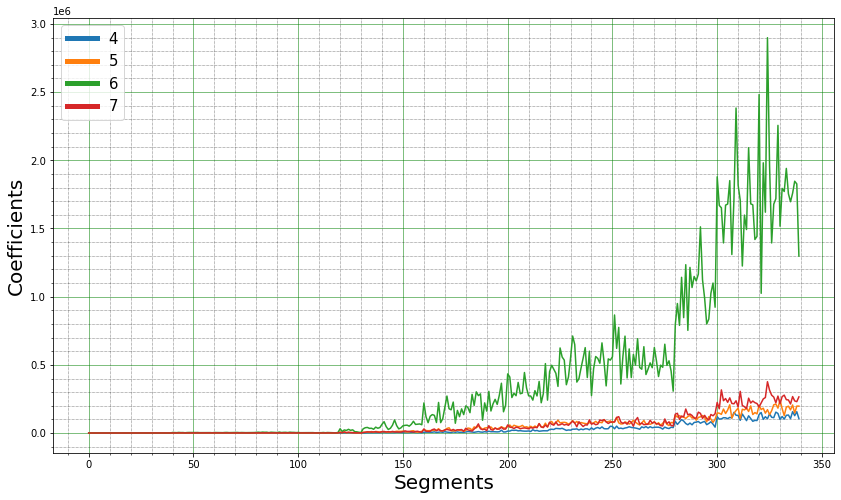

In [21]:
fig, ax = plt.subplots()
feature_matrix_wpt.iloc[:,4:].plot(figsize = (14,8),ax = ax)
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.5', color='g')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
leg = plt.legend(loc = 2,prop = {'size':15})
leg_lines = leg.get_lines()
plt.setp(leg_lines, linewidth = 5)
plt.xlabel('Segments',fontsize = 20)
plt.ylabel('Coefficients',fontsize = 20)
plt.show()

In [22]:
stable  = ['stable']*120
transition = ['transition']*160
unstable = ['unstable']*60

status = stable + transition + unstable

In [23]:
feature_matrix_wpt['Status'] = status

In [24]:
feature_matrix_wpt

,0,1,2,3,4,5,6,7,Status
0,7.550988e+05,3.237739e+04,6.257317e+02,1.931027e+03,421.751580,380.141275,4.423725e+02,484.972989,stable
1,8.316839e+05,2.901109e+04,8.632796e+02,1.835595e+03,307.304260,343.268007,4.326257e+02,382.840166,stable
2,6.634754e+05,1.602593e+04,6.317716e+02,1.605435e+03,348.666856,438.108110,3.502507e+02,436.015551,stable
3,6.256357e+05,1.876665e+04,4.443071e+02,1.023726e+03,428.968524,366.537116,3.017932e+02,427.229202,stable
4,6.936452e+05,1.398977e+04,6.239421e+02,1.632583e+03,440.897150,355.007638,4.727140e+02,408.486105,stable
...,...,...,...,...,...,...,...,...,...
335,6.686846e+09,7.047190e+08,2.156604e+06,1.165977e+08,105726.096356,170258.394887,1.696266e+06,213327.195453,unstable
336,6.960070e+09,6.396076e+08,2.572235e+06,9.847433e+07,156942.973410,206133.006572,1.758506e+06,267671.503703,unstable
337,6.884604e+09,6.336618e+08,2.735507e+06,8.729395e+07,127728.059040,146671.733146,1.846611e+06,235678.529255,unstable
338,6.975622e+09,6.708821e+08,2.573093e+06,9.662983e+07,156502.949774,197772.807374,1.826750e+06,230405.371466,unstable


In [25]:
feature_matrix_wpt.to_csv('feature_matrix_wpt8.csv')